In [2]:
from __future__ import division
from IPython.display import display, Math, Latex
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
from scipy.stats import norm
import scipy as sp
from scipy.integrate import simps
from numpy import trapz

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [3]:
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [4]:
wzp = -0.029 # Quasar Correction; defined in Bailor-Jones but computed in Lindegren et al. 2018

In [5]:
# Posterior PDF from Bailor-Jones et al.

def pOfR(r, px, dpx, Lsph):
    """
    This is Equation 2 in Bailer-Jones et al. 2018.
    NB, r > 0
    Here, input r in pc's.
    """
    r = r/1000. #convert pc to kpc
    #px = px + 0.029 #Quasar correction already accounted for 
    exponent = -r/Lsph - (px-wzp-1/r)**2/(2*dpx**2)
    ans = r**2*np.exp(exponent)
    return ans


In [6]:
# plotting preamble

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        #'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

# J1910 parallax measurements

In [7]:
pxmax = .3
pxmin = 1.6
gx = np.linspace(pxmax, pxmin, 1000)

In [8]:
# s/n of detection
(-0.4219)/0.7972


-0.5292272955343703

In [9]:
# Gaia parallax
pxGDR2 = -0.4219
pxGDR2err = 0.7972

In [10]:
pxGDR2

-0.4219

In [11]:
dx = np.linspace(.1, 7500, 1000)

In [12]:
# Corrected Bailer-Jones distance estimate
bj_1910 = []
for r in dx:
    bj_1910.append(pOfR(r,-0.4219, 0.7972,1.44921521296784))
    #bj_1910.append(pOfR(r,-0.4219, 0.7972,1449.215213))

In [13]:
# LK distance parallax distance measurement, Desvignes et al. 2016, Table 9.
d_pi_PTA_1910 = 550
eplus_pi_PTA_1910 = 460   # error on this
eminus_pi_PTA_1910 = 184   # error on this

# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE_1910 = 2327
eplus_DM_NE_1910 = 311
eminus_DM_NE_1910 = 317

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1910 = 1496.0  # no errors reported here...

In [14]:
# PTA LK-corrected PX measurement , D16
px1910 = dx
dist_px1910 = norm(554, 460)

In [15]:
# Pb dot distance estimate
#dist_px1910_pbdot = norm(1200, 200)

In [16]:
#areaT = trapz(valR16, dx) # are curves really normalized to 1?
areaPTA = simps(dist_px1910.pdf(px1910), dx)

#areaSDR2 = simps(valGDR2, dx)
areaBJ = simps(bj_1910,dx)

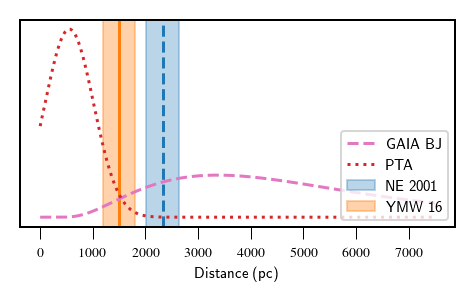

In [19]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1910 - eminus_DM_NE_1910, d_DM_NE_1910 + eplus_DM_NE_1910, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1910, ymin=0, ymax=1, color = "C0", linestyle = 'dashed')

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1910*.8, d_DM_YMW_1910*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1910, ymin=0, ymax=1, color = "C1")

# GAIA distance, to be updated
plt.plot(dx, np.array(bj_1910)/areaBJ, label = "GAIA BJ", color = "C6", linestyle='dashed')

# LK-correcred PX measurements
plt.plot(dx, dist_px1910.pdf(px1910)/areaPTA, label = r"PTA", color = "C3", linestyle='dotted')

ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend(loc=4)
plt.tight_layout()

#plt.savefig("J1910_distances_wbj.pdf")

In [20]:
valPTA = dist_px1910.pdf(px1910)/areaPTA


In [21]:
all_combo = np.array(valPTA)*np.array(bj_1910)

In [22]:
combo = np.array(valPTA)*np.array(bj_1910)
#combo = np.array(bj_1910)*np.array(dist_px1910_pbdot.pdf(px1910))

In [23]:
normCombo = simps(combo, dx)

In [24]:
new_normCombo = simps(all_combo, dx)


In [25]:
# log transform
new1910 = []
for ii in bj_1910:
    new1910.append(10**(ii))

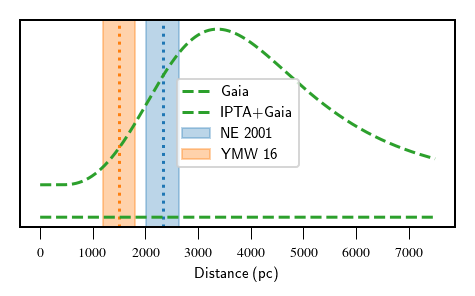

In [26]:
fig, ax1 = plt.subplots()
# DM NE 2001 model
ax1.axvspan(d_DM_NE_1910 - eminus_DM_NE_1910, d_DM_NE_1910 + eplus_DM_NE_1910, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1910, ymin=0, ymax=1, color = "C0",  linestyle=':')

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1910*.8, d_DM_YMW_1910*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1910, ymin=0, ymax=1, color = "C1", linestyle=':')

plt.plot(dx, np.array(new1910) , label = "Gaia", color = "C2", linestyle='dashed')
#plt.plot(dx, np.array(valPTA)/areaPTA, label = "PTA", color = "C3", linestyle='-.')
plt.plot(dx, combo/normCombo  , label = "IPTA+Gaia", color = "C2", linestyle='dashed')
#plt.plot(dx, dist_px1910_pbdot.pdf(px1910), label = "NG11", color = "C3", linestyle='dotted')
#plt.plot(dx, all_combo/new_normCombo, label = "Combined", color = "C4", linestyle='solid')

plt.yticks([])
#plt.xlim(0,2800)
plt.xlabel("Distance (pc)")
plt.tight_layout()
plt.legend()
#plt.savefig("all_combinedPDFs_1910_wDM_WNG.pdf")

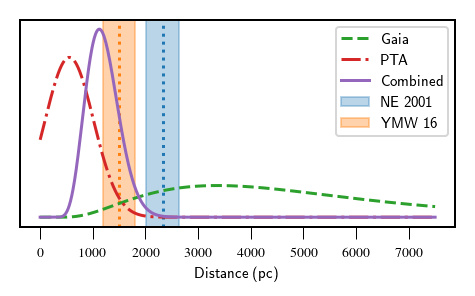

In [27]:
fig, ax1 = plt.subplots()
# DM NE 2001 model
ax1.axvspan(d_DM_NE_1910 - eminus_DM_NE_1910, d_DM_NE_1910 + eplus_DM_NE_1910, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1910, ymin=0, ymax=1, color = "C0",  linestyle=':')

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1910*.8, d_DM_YMW_1910*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1910, ymin=0, ymax=1, color = "C1", linestyle=':')

plt.plot(dx, np.array(bj_1910)/areaBJ , label = "Gaia", color = "C2", linestyle='dashed')
plt.plot(dx, np.array(valPTA)/areaPTA, label = "PTA", color = "C3", linestyle='-.')
plt.plot(dx, combo/normCombo, label = "Combined", color = "C4", linestyle='solid')
#plt.plot(dx, dist_px1910_pbdot.pdf(px1910), label = "NG11", color = "C3", linestyle='-.')
#plt.plot(dx, all_combo/new_normCombo, label = "Combined", color = "C4", linestyle='solid')

plt.yticks([])
#plt.xlim(350,2800)
plt.xlabel("Distance (pc)")
plt.tight_layout()
plt.legend()
#plt.savefig("all_combinedPDFs_1910_wDM.pdf")

In [28]:
# the following code was modified from 
# https://github.com/Ffisegydd/python-examples/blob/master/examples/scipy/fitting%20a%20gaussian%20with%20scipy%20curve_fit.py

In [29]:
from scipy.optimize import curve_fit

In [83]:
newx = (dx/1000)
#newy = (np.array(combo/normCombo))
newy = new1910

In [84]:
# Create a function which returns a Gaussian (normal) distribution.
def gauss(x, *p):
    a, b, c, d = p
    y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.)) + d
    return y

In [85]:
p_initial = [1.0, 2.5, 0.1, 0.0]

In [86]:
popt, pcov = curve_fit(gauss, newx, newy, p0=p_initial)

In [87]:
y_fit = gauss(newx, *popt)

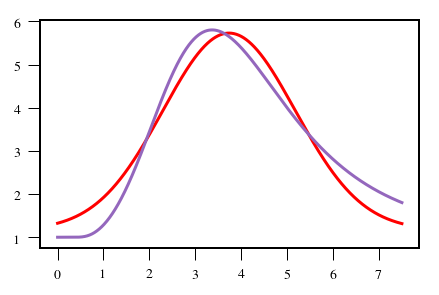

In [89]:
fig, ax = plt.subplots()
ax.plot(newx, y_fit, color = 'red')
plt.plot(dx/1000, new1910 , label = "Combined", color = "C4", linestyle='solid')

In [90]:
# mean distance from fit
popt[1]*1000

3734.5790836449737

In [91]:
# 1-sigma error on distance fit
popt[2]*1000

1442.3013632544194